In [30]:
"""
Workflow of Data Scientist:
1. Data Collection
2. Data Cleaning: handle missing values, remove duplicates, remove outliers, standardize formats
3. Exploratory Data Analysis (EDA): 
    Explore data patterns and distributions
    Summary statistics and Visualization
4. Feature Engineering:
    Selection of most relevant features
5. Data Transformation:
    Normalize or standardize data
    Encode categorical variables
    Create new features if necessary
6. Data Splitting: Train, Validation, Test (80, 10, 10)
    Train set: Used to train the model / estimation of funnction that we are learning from the data
    Test set:  Perormance of the ML Algo
    Validation set: Use for monitoring the performance of the ML algo during training and may be providing some modification during training to improve the performance or control the training.

    The split should be unbiased, fair and representative in all the splits.
"""

'\nWorkflow of Data Scientist:\n1. Data Collection\n2. Data Cleaning: handle missing values, remove duplicates, remove outliers, standardize formats\n3. Exploratory Data Analysis (EDA): \n    Explore data patterns and distributions\n    Summary statistics and Visualization\n4. Feature Engineering:\n    Selection of most relevant features\n5. Data Transformation:\n    Normalize or standardize data\n    Encode categorical variables\n    Create new features if necessary\n6. Data Splitting: Train, Validation, Test (80, 10, 10)\n    Train set: Used to train the model / estimation of funnction that we are learning from the data\n    Test set:  Perormance of the ML Algo\n    Validation set: Use for monitoring the performance of the ML algo during training and may be providing some modification during training to improve the performance or control the training.\n\n    The split should be unbiased, fair and representative in all the splits.\n'

In [31]:
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [32]:
root_dir = "E:\\Programming\\AI\\ML Files\\Live Courses\\BongoDev Bootcamp - Data Science, Machine Learning & MLOps\\5-Pandas"
data_dir = os.path.join(root_dir, "data")
dataset_path = os.path.join(data_dir, "health_monitor_data.csv")

print(dataset_path)

E:\Programming\AI\ML Files\Live Courses\BongoDev Bootcamp - Data Science, Machine Learning & MLOps\5-Pandas\data\health_monitor_data.csv


In [33]:
# Load Dataset 
df = pd.read_csv(dataset_path)
print(df.head())

   Duration          Date  Pulse  Maxpulse  Calories      Type
0        60  '2020/12/01'    110       130     409.1      Easy
1        60  '2020/12/02'    117       145     479.0  Moderate
2        60  '2020/12/03'    103       135     340.0  Moderate
3        45  '2020/12/04'    109       175     282.4  Moderate
4        45  '2020/12/05'    117       148     406.0     Heavy


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  33 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     33 non-null     int64  
 3   Maxpulse  33 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      33 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [35]:
""" Handle missing values
Approach-1: drop rows with missing values (when dataset is large eough)
Approach-2 (imputation): fill missing values with mean/median/mode (when dataset is small)
"""

' Handle missing values\nApproach-1: drop rows with missing values (when dataset is large eough)\nApproach-2 (imputation): fill missing values with mean/median/mode (when dataset is small)\n'

In [36]:
mask = df.isnull()
print(mask.head())

   Duration   Date  Pulse  Maxpulse  Calories   Type
0     False  False  False     False     False  False
1     False  False  False     False     False  False
2     False  False  False     False     False  False
3     False  False  False     False     False  False
4     False  False  False     False     False  False


In [37]:
mask = df.isnull().any() #Column-wise: default, axis=0
print(mask)

Duration    False
Date         True
Pulse       False
Maxpulse    False
Calories     True
Type        False
dtype: bool


In [38]:
mask = df.isnull().any(axis=1) #Row-wise
print(mask.head())

0    False
1    False
2    False
3    False
4    False
dtype: bool


In [39]:
df[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
18,45,'2020/12/18',90,112,NaN,Moderate
22,45,NaN,100,119,282.0,Moderate
28,60,'2020/12/28',103,132,NaN,Heavy


In [40]:
avg_cal = df["Calories"].mean()
print(avg_cal)

302.93870967741935


In [41]:
df["Calories"] = df["Calories"].fillna(avg_cal)
df[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
18,45,'2020/12/18',90,112,302.93871,Moderate
22,45,NaN,100,119,282.00000,Moderate
28,60,'2020/12/28',103,132,302.93871,Heavy


In [42]:
df = df.dropna()

print(df.isnull().sum())

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
Type        0
dtype: int64


In [43]:
""" Remove duplicates
"""

mask = df.duplicated()
print(mask.sum())
print(df[mask])

1
    Duration          Date  Pulse  Maxpulse  Calories   Type
32        60  '2020/12/12'    100       120     250.7  Heavy


In [44]:
df = df.drop_duplicates()

mask = df.duplicated()
print(mask.sum())
print(df[mask])

0
Empty DataFrame
Columns: [Duration, Date, Pulse, Maxpulse, Calories, Type]
Index: []


In [45]:
""" 
Data type conversion
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  31 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     31 non-null     int64  
 3   Maxpulse  31 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      31 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.7+ KB


In [46]:
df["Date"] = df["Date"].astype("datetime64[ns]")
print(df["Date"].dtype)

datetime64[ns]


In [47]:
""" 
Exploratory Data Analysis (EDA)
"""

df.describe()

,Duration,Date,Pulse,Maxpulse,Calories
count,31.000000,31,31.000000,31.000000,31.000000
mean,69.193548,2020-12-15 16:15:29.032258048,103.612903,128.806452,305.299272
min,30.000000,2020-12-01 00:00:00,90.000000,101.000000,195.100000
25%,60.000000,2020-12-08 12:00:00,100.000000,120.000000,250.700000
50%,60.000000,2020-12-15 00:00:00,103.000000,128.000000,300.000000
75%,60.000000,2020-12-23 12:00:00,107.000000,132.500000,342.650000
max,450.000000,2020-12-31 00:00:00,130.000000,175.000000,479.000000
std,71.064487,NaN,7.935899,13.095596,64.760652


<Axes: xlabel='Pulse'>

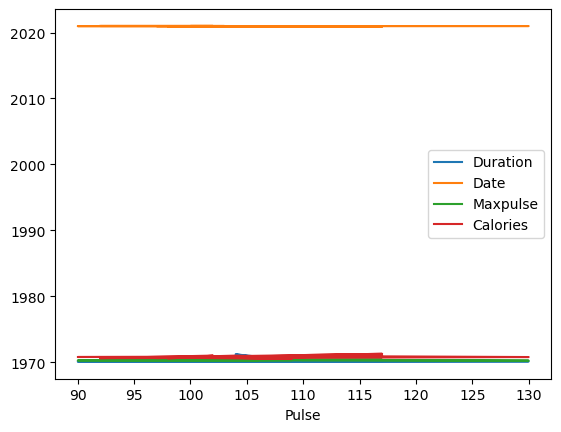

In [48]:
df.plot(kind="line", x= "Pulse")

In [52]:
""" Remove outliers using InterQuantile range (IQR) 
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
R = Q3 + 1.5 * IQR
"""

Q1 = df["Pulse"].quantile(0.25)
print("Q1:", Q1)

Q3 = df["Pulse"].quantile(0.75)
print("Q3:", Q3)

IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
R = Q3 + 1.5 * IQR
print("L:", L, "R:", R)

Q1: 100.0
Q3: 107.0
L: 89.5 R: 117.5


In [54]:
non_outlier_mask = df["Pulse"].between(L, R)
outlier_mask = ~non_outlier_mask
print(df[outlier_mask])

    Duration       Date  Pulse  Maxpulse  Calories   Type
23        60 2020-12-23    130       101     300.0  Heavy


In [55]:
df = df[non_outlier_mask]
print(df[outlier_mask])

Empty DataFrame
Columns: [Duration, Date, Pulse, Maxpulse, Calories, Type]
Index: []


C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_21364\3820760518.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[outlier_mask])


In [ ]:
""" Feature Engineering
Select the most relevant features by experience or applying feature selection methods
"""

In [57]:
""" Data Transformation

Numeric: We need to normalize out data
Categorical: We need to encode categorical variables
"""

def normalize(col): #standardization
    mean = col.mean()
    std = col.std()
    normalized_col = (col - mean) / std

    return normalized_col

df["Pulse"] = df["Pulse"].agg(normalize)
df["Maxpulse"] = df["Maxpulse"].agg(normalize)
df["Duration"] = df["Duration"].agg(normalize)
df["Calories"] = df["Calories"].agg(normalize)

df.head()

C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_21364\1325972247.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pulse"] = df["Pulse"].agg(normalize)
C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_21364\1325972247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Maxpulse"] = df["Maxpulse"].agg(normalize)
C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_21364\1325972247.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,-0.131472,2020-12-01,1.144105,0.021784,1.573396,Easy
1,-0.131472,2020-12-02,2.246225,1.247111,2.634735,Moderate
2,-0.131472,2020-12-03,0.041986,0.430226,0.524203,Moderate
3,-0.339060,2020-12-04,0.986660,3.697765,-0.350377,Moderate
4,-0.339060,2020-12-05,2.246225,1.492176,1.526326,Heavy


In [58]:
"""Encoding catagorical data
    1. One Hot Encoding (Using Pandas and Scikit-learn)
    2. Label Encoding
"""

df["Type"].value_counts()

Type
Moderate    14
Heavy       12
Easy         4
Name: count, dtype: int64

In [60]:
"""One Hot Encoding
Category: Type
Values: Easy, Moderate, Heavy

Easy => [1, 0, 0]
Moderate => [0, 1, 0]
Heavy => [0, 0, 1]
"""

df_hot_encoded = pd.get_dummies(df, columns=["Type"], sparse= True)

df_hot_encoded.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type_Easy,Type_Heavy,Type_Moderate
0,-0.131472,2020-12-01,1.144105,0.021784,1.573396,True,False,False
1,-0.131472,2020-12-02,2.246225,1.247111,2.634735,False,False,True
2,-0.131472,2020-12-03,0.041986,0.430226,0.524203,False,False,True
3,-0.339060,2020-12-04,0.986660,3.697765,-0.350377,False,False,True
4,-0.339060,2020-12-05,2.246225,1.492176,1.526326,False,True,False


In [61]:
"""Label Encoding
Catagory: Type 
Values: Easy, Moderate, Heavy

Easy: 1
Moderate: 2
Heavy: 3
"""

df["label_encoded_type"] = pd.Categorical(df["Type"], categories=["Easy", "Moderate", "Heavy"], ordered=True).codes
print(df.head())

   Duration       Date     Pulse  Maxpulse  Calories      Type  \
0 -0.131472 2020-12-01  1.144105  0.021784  1.573396      Easy   
1 -0.131472 2020-12-02  2.246225  1.247111  2.634735  Moderate   
2 -0.131472 2020-12-03  0.041986  0.430226  0.524203  Moderate   
3 -0.339060 2020-12-04  0.986660  3.697765 -0.350377  Moderate   
4 -0.339060 2020-12-05  2.246225  1.492176  1.526326     Heavy   

   label_encoded_type  
0                   0  
1                   1  
2                   1  
3                   1  
4                   2  


C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_21364\1321020334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label_encoded_type"] = pd.Categorical(df["Type"], categories=["Easy", "Moderate", "Heavy"], ordered=True).codes


In [ ]:
"""Data Splitting:
    Split the data into Train, Validation, and Test sets
"""